# 07-08: EDA e PCA

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## Pandas df exploration

In [56]:
df = pd.read_excel("body.xlsx", index_col=0)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, 1 to 507
Data columns (total 25 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Biacromial diameter (see Fig. 2)                            507 non-null    float64
 1   Biiliac diameter, or "pelvic breadth" (see Fig. 2)          507 non-null    float64
 2   Bitrochanteric diameter (see Fig. 2)                        507 non-null    float64
 3   Chest depth between spine and sternum at nipple level,      507 non-null    float64
 4   Chest diameter at nipple level, mid-expiration              507 non-null    float64
 5   Elbow diameter, sum of two elbows                           507 non-null    float64
 6   Wrist diameter, sum of two wrists                           507 non-null    float64
 7   Knee diameter, sum of two knees                             507 non-null    float64
 8   Ankle

In [58]:
height = df["Height (cm)"].values
gender = df["Gender (1 - male, 0 - female)"].values
weight = df["Weight (kg)"].values

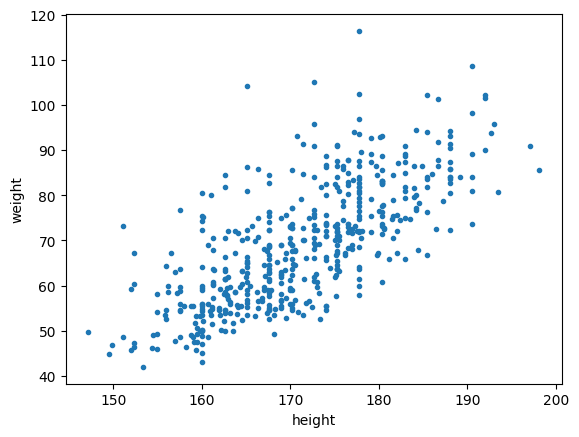

In [59]:
#plt.plot(height, weight, "o")
plt.scatter(height, weight, marker=".")
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

## Statistiche principali

In [60]:
mean = df.mean()
corr = df.corr()
cov = df.cov()
std = df.std()

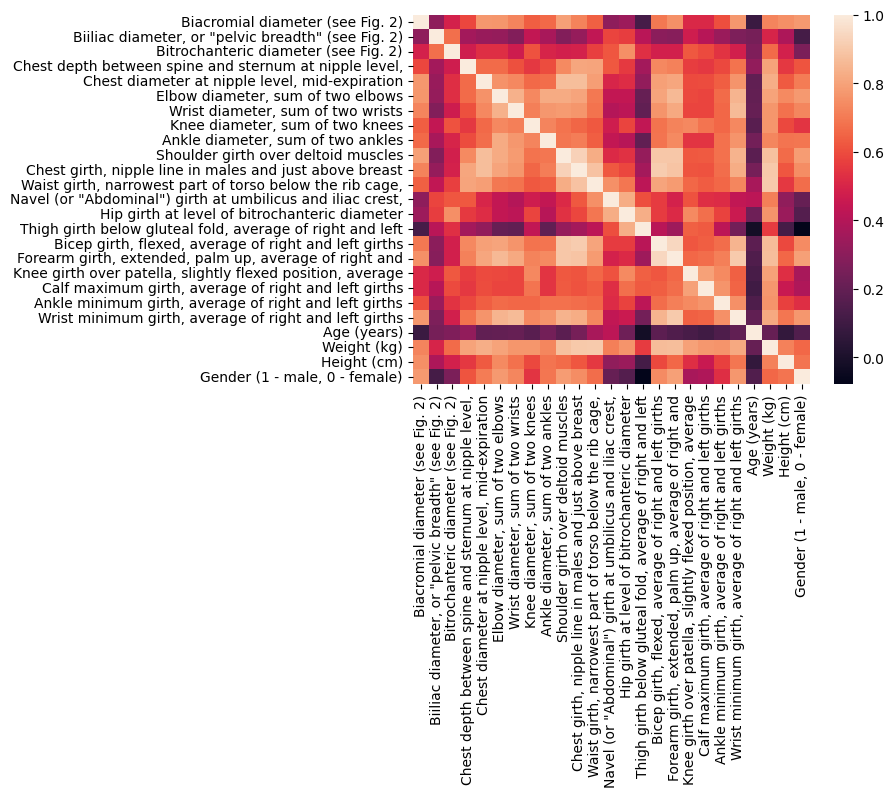

In [61]:
sns.heatmap(corr)
plt.show()

In [62]:
female = df[df["Gender (1 - male, 0 - female)"] == 0]
male = df[df["Gender (1 - male, 0 - female)"] == 1]

f_weight = female["Weight (kg)"]
f_height = female["Height (cm)"]

m_weight = male["Weight (kg)"]
m_height = male["Height (cm)"]

## KDE Plot

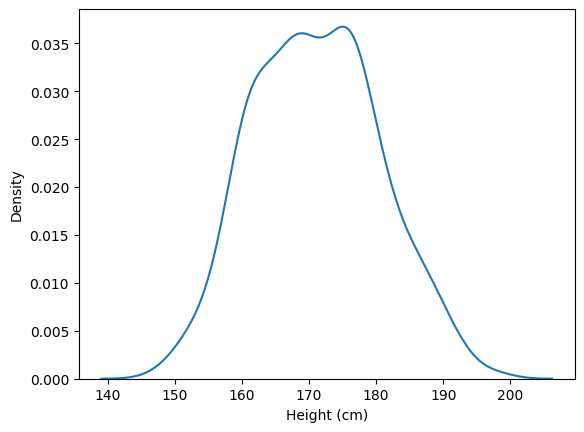

In [63]:
sns.kdeplot(df["Height (cm)"])
plt.show()

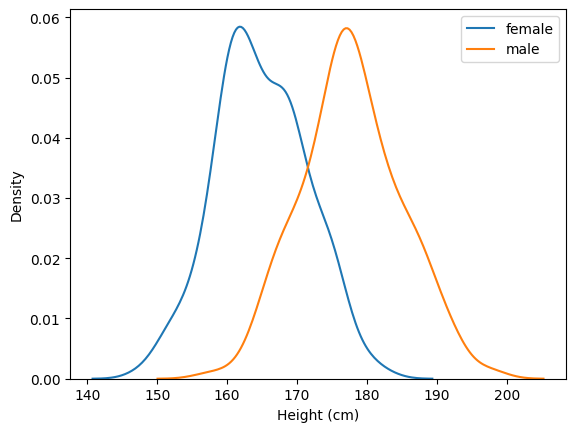

In [64]:
sns.kdeplot(f_height, label="female")
sns.kdeplot(m_height, label="male")
plt.legend()
plt.show()

## Scatter Plot

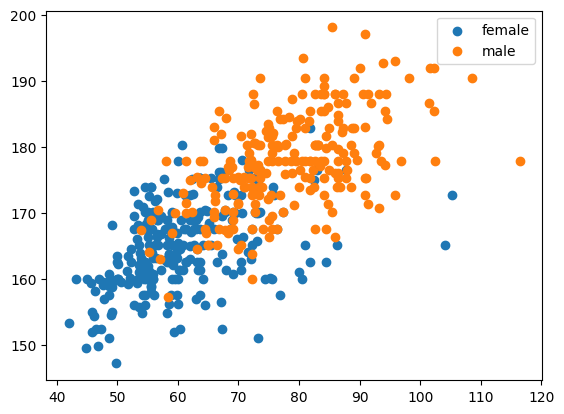

In [65]:
plt.scatter(f_weight, f_height, label="female")
plt.scatter(male["Weight (kg)"], male["Height (cm)"], label="male")
plt.legend()
plt.show()

**Alternativa**

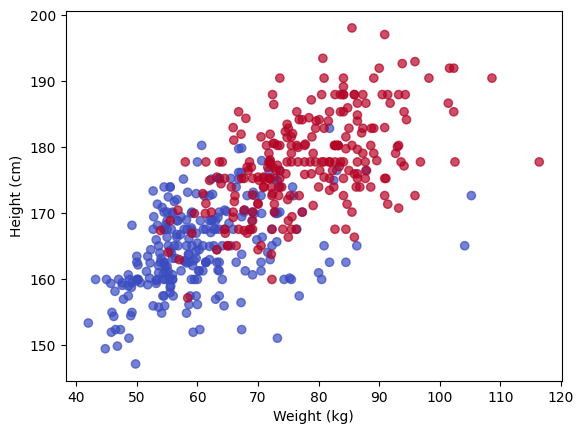

In [66]:
# concateni i dati
weights = np.concatenate([female["Weight (kg)"], male["Weight (kg)"]])
heights = np.concatenate([female["Height (cm)"], male["Height (cm)"]])

# etichette di classe
y = np.concatenate([
    np.zeros(len(female)),  # female = 0
    np.ones(len(male))      # male = 1
])

plt.scatter(weights, heights, c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.show()

## Covarianza e Correlazione Lineare

In [67]:
np.round(np.cov(height, weight), 2) 

array([[ 88.5 ,  90.05],
       [ 90.05, 178.11]])

In [68]:
np.round(np.corrcoef(height, weight), 2)

array([[1.  , 0.72],
       [0.72, 1.  ]])

## Standard Scaling

In [69]:
centered = df - df.mean()
print(centered.shape)
centered = centered.drop(["Gender (1 - male, 0 - female)"], axis=1)
print(centered.shape)

(507, 25)
(507, 24)


In [70]:
scaled = centered / df.std(ddof=1)

In [71]:
round(scaled.mean(),2)

Age (years)                                                   0.0
Ankle diameter, sum of two ankles                            -0.0
Ankle minimum girth, average of right and left girths         0.0
Biacromial diameter (see Fig. 2)                             -0.0
Bicep girth, flexed, average of right and left girths        -0.0
Biiliac diameter, or "pelvic breadth" (see Fig. 2)           -0.0
Bitrochanteric diameter (see Fig. 2)                          0.0
Calf maximum girth, average of right and left girths          0.0
Chest depth between spine and sternum at nipple level,        0.0
Chest diameter at nipple level, mid-expiration                0.0
Chest girth, nipple line in males and just above breast      -0.0
Elbow diameter, sum of two elbows                             0.0
Forearm girth, extended, palm up, average of right and       -0.0
Gender (1 - male, 0 - female)                                 NaN
Height (cm)                                                  -0.0
Hip girth 

In [72]:
round(scaled.std(),2)

Age (years)                                                   1.0
Ankle diameter, sum of two ankles                             1.0
Ankle minimum girth, average of right and left girths         1.0
Biacromial diameter (see Fig. 2)                              1.0
Bicep girth, flexed, average of right and left girths         1.0
Biiliac diameter, or "pelvic breadth" (see Fig. 2)            1.0
Bitrochanteric diameter (see Fig. 2)                          1.0
Calf maximum girth, average of right and left girths          1.0
Chest depth between spine and sternum at nipple level,        1.0
Chest diameter at nipple level, mid-expiration                1.0
Chest girth, nipple line in males and just above breast       1.0
Elbow diameter, sum of two elbows                             1.0
Forearm girth, extended, palm up, average of right and        1.0
Gender (1 - male, 0 - female)                                 NaN
Height (cm)                                                   1.0
Hip girth 

## PCA

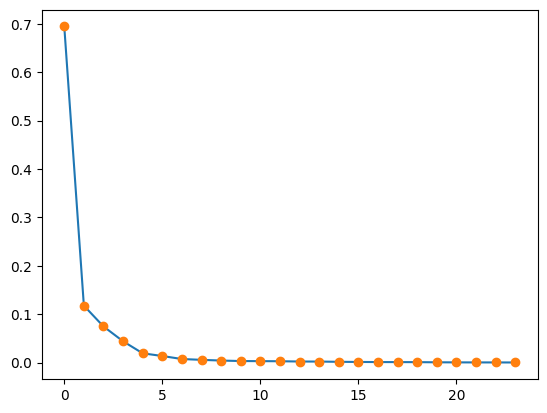

In [73]:
pca = PCA()
#centered = pca.fit_transform(centered)
pca.fit(centered)

plt.plot(pca.explained_variance_ratio_, '-')
plt.plot(pca.explained_variance_ratio_, 'o')
plt.show()

In [74]:
summ = 0
thr = 0.9
k = 0

for var in pca.explained_variance_ratio_:
    if summ <= thr:
        k += 1
        summ += var
    else:
        break

print(k)

4


In [75]:
pca = PCA(n_components=k)
p_array = pca.fit_transform(centered)
p_df = pd.DataFrame(p_array)
p_df.columns = ["c1", "c2", "c3", "c4"]
p_df["target"] = gender

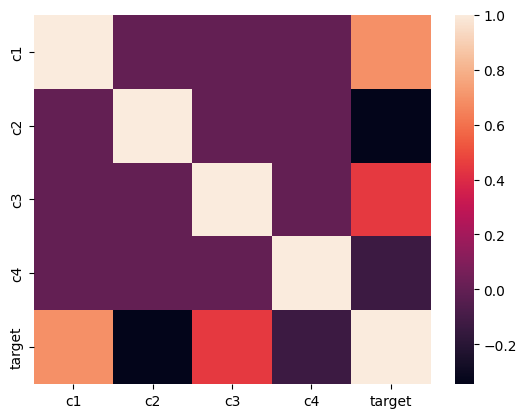

In [76]:
sns.heatmap(p_df.corr())
plt.show()

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(p_array, gender, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

regr = LinearRegression()
regr.fit(x_train, y_train)

predictions = regr.predict(x_test)
predictions = (predictions >= 0.5).astype(int)
acc = accuracy_score(predictions, y_test)
print(round(acc,2))

(405, 4)
(102, 4)
(405,)
(102,)
0.97


## Factor Loadings

In [78]:
loadings = pca.components_.T
l_df = pd.DataFrame(loadings, index=centered.columns, columns= ["c1", "c2", "c3", "c4"])

In [79]:
l_df

,c1,c2,c3,c4
Biacromial diameter (see Fig. 2),0.088647,-0.106290,0.096804,0.026067
"Biiliac diameter, or ""pelvic breadth"" (see Fig. 2)",0.042160,0.047046,-0.051891,0.141353
Bitrochanteric diameter (see Fig. 2),0.052266,0.030594,-0.047169,0.109800
"Chest depth between spine and sternum at nipple level,",0.081933,0.010757,0.022322,-0.023044
"Chest diameter at nipple level, mid-expiration",0.092392,-0.044954,0.042627,-0.060098
"Elbow diameter, sum of two elbows",0.043226,-0.030326,0.037368,0.009872
"Wrist diameter, sum of two wrists",0.028752,-0.018737,0.025919,0.001314
"Knee diameter, sum of two knees",0.039211,-0.014619,-0.002909,0.027345
"Ankle diameter, sum of two ankles",0.036049,-0.017290,0.032360,0.026081
Shoulder girth over deltoid muscles,0.372689,-0.226972,0.190561,-0.341242


In [80]:
c1 = l_df["c1"]
b_c1 = c1 >= c1.mean()
b_c1

Biacromial diameter (see Fig. 2)                              False
Biiliac diameter, or "pelvic breadth" (see Fig. 2)            False
Bitrochanteric diameter (see Fig. 2)                          False
Chest depth between spine and sternum at nipple level,        False
Chest diameter at nipple level, mid-expiration                False
Elbow diameter, sum of two elbows                             False
Wrist diameter, sum of two wrists                             False
Knee diameter, sum of two knees                               False
Ankle diameter, sum of two ankles                             False
Shoulder girth over deltoid muscles                            True
Chest girth, nipple line in males and just above breast        True
Waist girth, narrowest part of torso below the rib cage,       True
Navel (or "Abdominal") girth at umbilicus and iliac crest,     True
Hip girth at level of bitrochanteric diameter                  True
Thigh girth below gluteal fold, average of right